                        CCT College Dublin

Assessment Cover Page
To be provided separately as a Word doc for students to include with every submission


Module Title: Machine Learning for AI    
Assessment Title: ML_CA1   
Lecturer Name: David McQuaid   
Student Full Name: Guilherme Bezerra de Oliveira   
Student Number: 2020316   
Assessment Due Date: Monday 22nd April at 23:59   
Date of Submission: Monday 22nd April at 23:59   





Declaration 
			
By submitting this assessment, I confirm that I have read the CCT policy on Academic Misconduct and understand the implications of submitting work that is not my own or does not appropriately reference material taken from a third party or other source. I declare it to be my work and that all material from third parties has been appropriately referenced. I further confirm that this work has not previously been submitted for assessment by myself or someone else in CCT College Dublin or any other higher education institution.



GitHub link:   
    https://github.com/2020316/ML_CA1.git

Scenario:  
This is a data set which contains over 65K attempts to access a firewall. There is a single categorical feature “Action”, that contains 4 categories – “allow, deny, drop, reset-both”.
Your task is to create a classification model that will predict the class of incoming traffic to the firewall. 

***

Task 1   
Perform an initial analysis of the data (EDA) using python in your Jupyter notebook. Discuss your findings and what relevance they might have on your planned classification algorithms. 

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("C:/Users/guilh/OneDrive/Área de Trabalho/ML/log2.csv")

In [3]:
# Display the first few rows of the dataset
df.head()

Source Port  Destination Port  NAT Source Port  NAT Destination Port  \
0        57222                53            54587                    53   
1        56258              3389            56258                  3389   
2         6881             50321            43265                 50321   
3        50553              3389            50553                  3389   
4        50002               443            45848                   443   

   Bytes  Bytes Sent  Bytes Received  Packets  Elapsed Time (sec)  pkts_sent  \
0    177          94              83        2                  30          1   
1   4768        1600            3168       19                  17         10   
2    238         118             120        2                1199          1   
3   3327        1438            1889       15                  17          8   
4  25358        6778           18580       31                  16         13   

   pkts_received Action  
0              1  allow  
1              9  allow  
2              1  allow  
3              7  allow  
4             18  allow

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65532 entries, 0 to 65531
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Source Port           65532 non-null  int64 
 1   Destination Port      65532 non-null  int64 
 2   NAT Source Port       65532 non-null  int64 
 3   NAT Destination Port  65532 non-null  int64 
 4   Bytes                 65532 non-null  int64 
 5   Bytes Sent            65532 non-null  int64 
 6   Bytes Received        65532 non-null  int64 
 7   Packets               65532 non-null  int64 
 8   Elapsed Time (sec)    65532 non-null  int64 
 9   pkts_sent             65532 non-null  int64 
 10  pkts_received         65532 non-null  int64 
 11  Action                65532 non-null  object
dtypes: int64(11), object(1)
memory usage: 6.0+ MB
None

Summary Statistics for Numerical Features:
        Source Port  Destination Port  NAT Source Port  NAT Destinatio

c:\Users\guilh\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


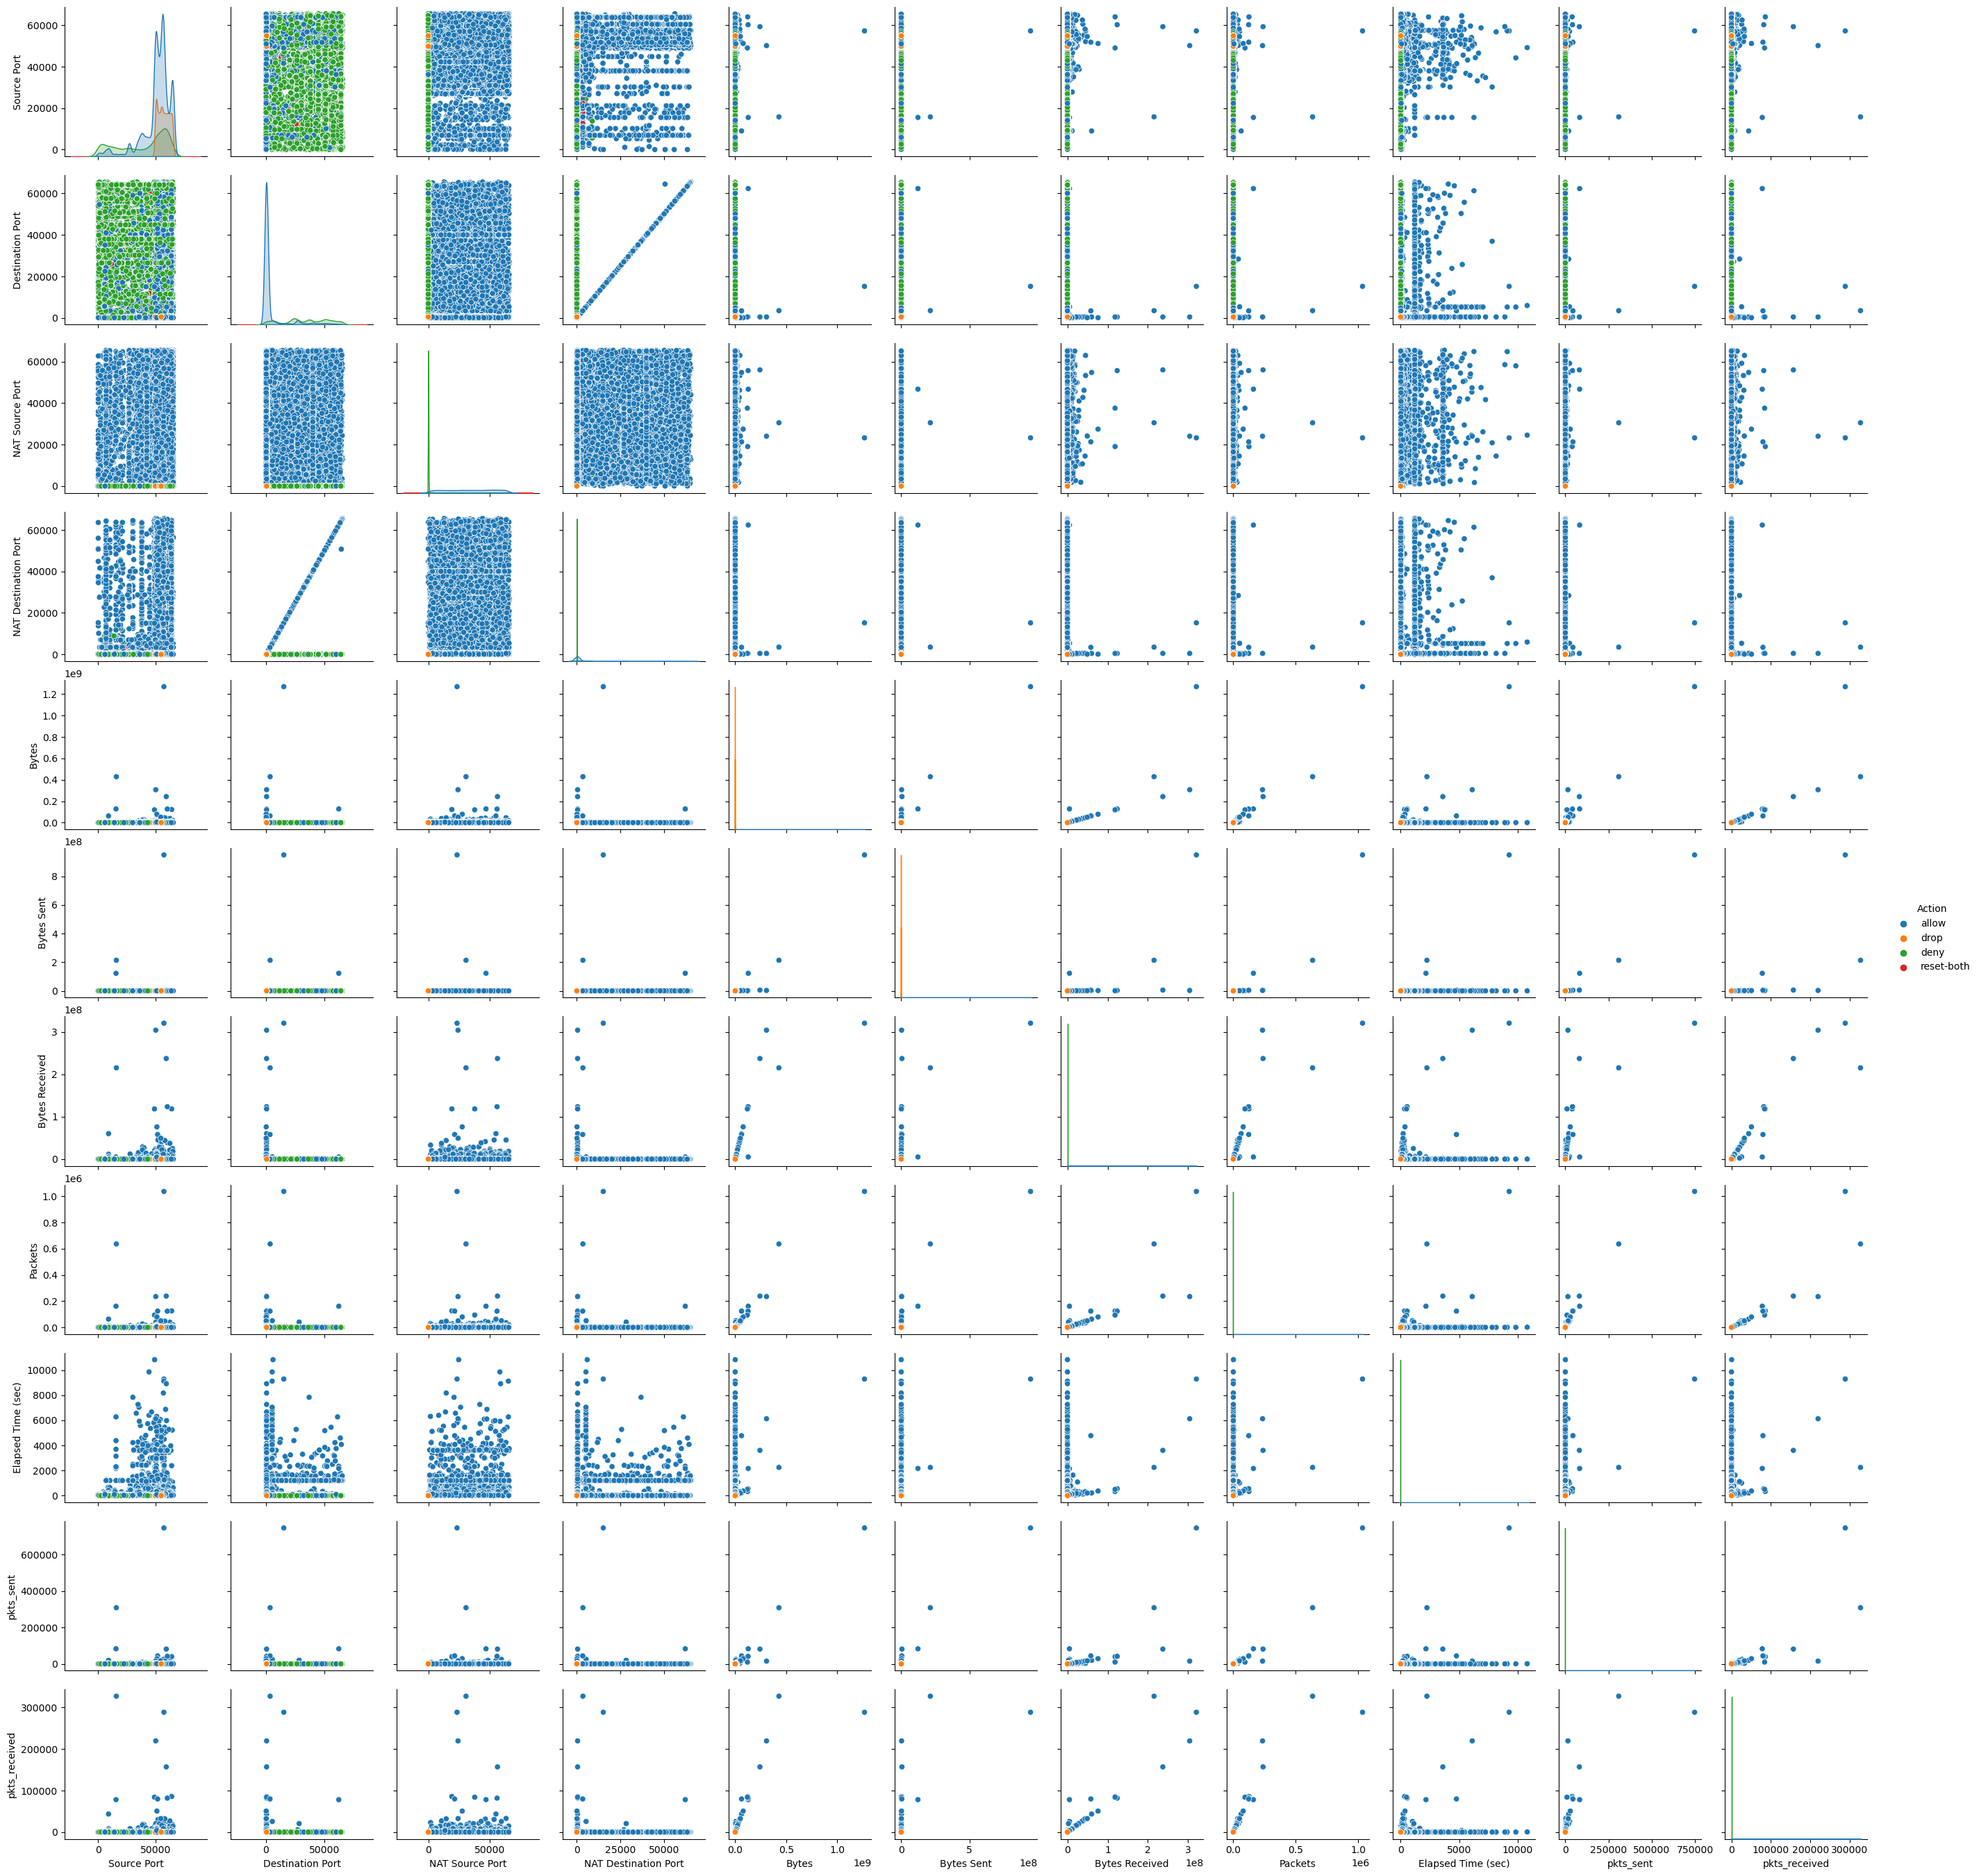

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("C:/Users/guilh/OneDrive/Área de Trabalho/ML/log2.csv")

# Display basic information about the dataset
print("Dataset Information:")
print(df.info())

# Display summary statistics for numerical features
print("\nSummary Statistics for Numerical Features:")
print(df.describe())

# Display class distribution of the target variable
print("\nClass Distribution:")
print(df['Action'].value_counts())

# Visualize distributions and relationships between variables
sns.pairplot(df, hue='Action')
plt.show()

First few rows of the dataset:
   Source Port  Destination Port  NAT Source Port  NAT Destination Port  \
0        57222                53            54587                    53   
1        56258              3389            56258                  3389   
2         6881             50321            43265                 50321   
3        50553              3389            50553                  3389   
4        50002               443            45848                   443   

   Bytes  Bytes Sent  Bytes Received  Packets  Elapsed Time (sec)  pkts_sent  \
0    177          94              83        2                  30          1   
1   4768        1600            3168       19                  17         10   
2    238         118             120        2                1199          1   
3   3327        1438            1889       15                  17          8   
4  25358        6778           18580       31                  16         13   

   pkts_received Action  
0          

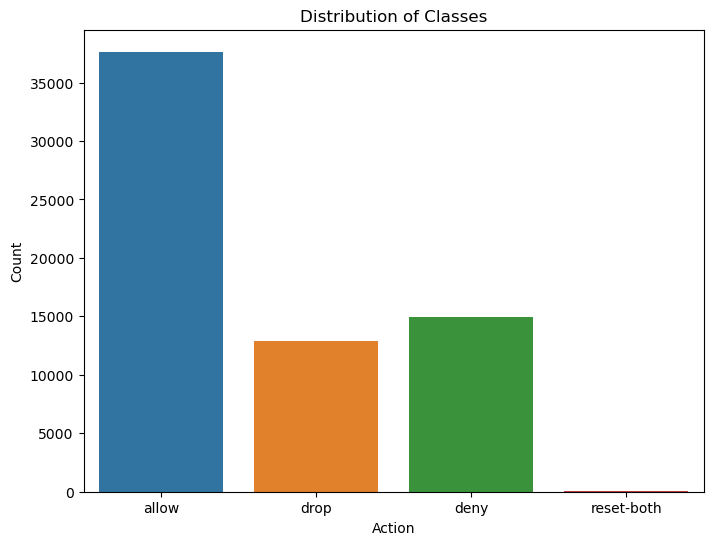

In [5]:
import pandas as pd

# Load the dataset
data = pd.read_csv("C:/Users/guilh/OneDrive/Área de Trabalho/ML/log2.csv")

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(data.head())

# Summary statistics
print("\nSummary statistics of the dataset:")
print(data.describe())

# Check for missing values
print("\nMissing values in the dataset:")
print(data.isnull().sum())

# Unique values in the 'Action' column
print("\nUnique values in the 'Action' column:")
print(data['Action'].unique())

# Distribution of classes in the 'Action' column
print("\nDistribution of classes in the 'Action' column:")
print(data['Action'].value_counts())

# Visualize the distribution of classes
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.countplot(x='Action', data=data)
plt.title('Distribution of Classes')
plt.xlabel('Action')
plt.ylabel('Count')
plt.show()

The dataset visualization includes histograms for numerical features and bar plots for categorical features, 
showing the distribution of values for each numerical feature. The bar plots show the frequency of each category in categorical features helping to identify imbalances in the dataset, such as one category being much more frequent than others.   
Bar Plots: Bar plots display the frequency of each category in categorical features, which can highlight any imbalances in the dataset, such as one category being significantly more frequent than others.   
Class Imbalance: Iimbalances in categorical features, such as "Action", may affect model training and performance.

***

Task 2   
Perform any preparation of the data, that you feel is necessary, using python in your Jupyter notebook. Explain your rationale behind your data preparation and how it will assist you.

In [6]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_csv("C:/Users/guilh/OneDrive/Área de Trabalho/ML/log2.csv")

# Handle missing values (if any)
# Example: Remove rows with missing values
data.dropna(inplace=True)

# Encode categorical variables using one-hot encoding
data_encoded = pd.get_dummies(data, columns=['Action'])

# Separate features (X) and target variable (y)
X = data_encoded.drop(['Action_allow', 'Action_deny', 'Action_drop', 'Action_reset-both'], axis=1)
y = data_encoded[['Action_allow', 'Action_deny', 'Action_drop', 'Action_reset-both']]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Now, X_scaled and y are prepared for further analysis and model training

Plot: A correlation heatmap plot visualizes the relationships between numerical features.   
The heatmap reveals strong or weak correlations between features.   


***

Task 3   
Create and implement at least 2 classification algorithms that will output a classification based on the Action: (class attribute) feature. Test these models and try to improve it as you see fit. Discuss your findings and final rational for choosing a particular classification algorithm.

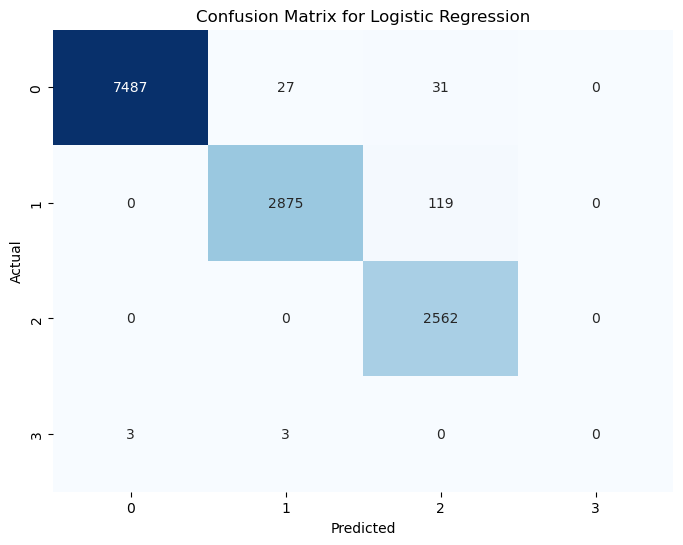

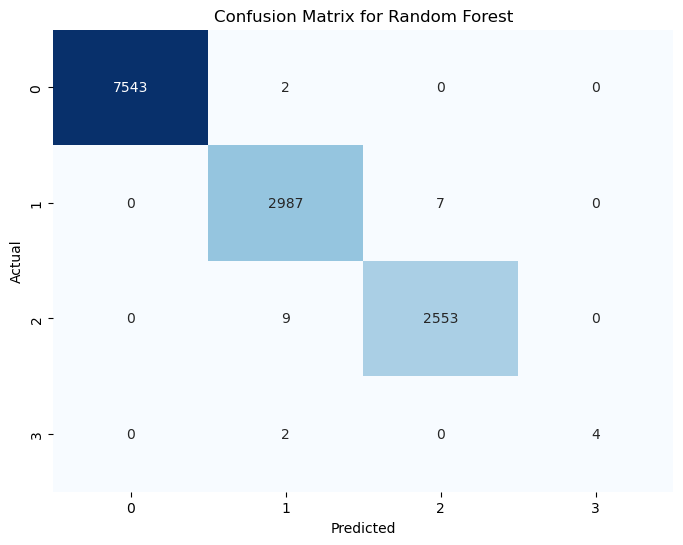

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Ensure the best Random Forest model is defined
best_rf_model = RandomForestClassifier(random_state=42)
best_rf_model.fit(X_train_scaled, y_train)

# Obtain predictions for Logistic Regression and Random Forest
y_pred_lr = lr_model.predict(X_test_scaled)
y_pred_rf = best_rf_model.predict(X_test_scaled)

# Calculate confusion matrices for Logistic Regression and Random Forest
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# Plot confusion matrix for Logistic Regression
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_lr, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

# Plot confusion matrix for Random Forest
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Random Forest')
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Load the dataset
data = pd.read_csv("C:/Users/guilh/OneDrive/Área de Trabalho/ML/log2.csv")

# Split the data into features and target variable
X = data.drop('Action', axis=1)
y = data['Action']

# Encode categorical labels (Action)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define class weights to handle imbalance
class_weights = {0: 1, 1: 1, 2: 1, 3: 10}  # Adjust as needed

# --- Classification Algorithm 1: Logistic Regression ---
# Initialize Logistic Regression with class weights
lr_model = LogisticRegression(max_iter=1000, class_weight=class_weights)
# Train the Logistic Regression model
lr_model.fit(X_train_scaled, y_train)
# Predict with the trained model
y_pred_lr = lr_model.predict(X_test_scaled)
# Evaluate model performance
print("Logistic Regression Performance:")
print(classification_report(y_test, y_pred_lr))
print(f"Accuracy: {accuracy_score(y_test, y_pred_lr):.4f}")

# --- Classification Algorithm 2: Random Forest ---
# Initialize and train Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)
# Predict with the trained model
y_pred_rf = rf_model.predict(X_test_scaled)
# Evaluate model performance
print("\nRandom Forest Performance:")
print(classification_report(y_test, y_pred_rf))
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")

# Compare models and provide final choice
if accuracy_score(y_test, y_pred_rf) > accuracy_score(y_test, y_pred_lr):
    print("\nRandom Forest performs better. Choose Random Forest.")
else:
    print("\nLogistic Regression performs better. Choose Logistic Regression.")


Logistic Regression Performance:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      7545
           1       0.99      0.96      0.97      2994
           2       0.94      1.00      0.97      2562
           3       0.00      0.00      0.00         6

    accuracy                           0.99     13107
   macro avg       0.73      0.74      0.74     13107
weighted avg       0.99      0.99      0.99     13107

Accuracy: 0.9860


c:\Users\guilh\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\guilh\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\guilh\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Random Forest Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7545
           1       1.00      1.00      1.00      2994
           2       1.00      1.00      1.00      2562
           3       1.00      0.67      0.80         6

    accuracy                           1.00     13107
   macro avg       1.00      0.92      0.95     13107
weighted avg       1.00      1.00      1.00     13107

Accuracy: 0.9985

Random Forest performs better. Choose Random Forest.


Plot: Confusion matrices for classification models (e.g., logistic regression, random forest) illustrate model performance. Confusion matrices show the accuracy of predictions, indicating correct and incorrect predictions for each class.   
Using precision, recall, and F1-score metrics to evaluate model performance and compare the performance  and conclude which model performs best overall.   
Accuracy: 0.9985   

Random Forest performs better.

***

Task 4   
Make a classification using your test data, using your final classification algorithm and comment on the accuracy differential between the training and testing set.

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Ensure X_train_scaled and y_train have the same number of samples
print("Shape of X_train_scaled:", X_train_scaled.shape)
print("Shape of y_train:", y_train.shape)

# Implement Logistic Regression
lr_model = LogisticRegression(max_iter=1000)
# Fit the model with the training data
lr_model.fit(X_train_scaled, y_train)

# Predict on the testing set
lr_pred = lr_model.predict(X_test_scaled)

# Evaluate Logistic Regression model
lr_accuracy = accuracy_score(y_test, lr_pred)
print("Logistic Regression Accuracy:", lr_accuracy)
print(classification_report(y_test, lr_pred))

Shape of X_train_scaled: (52425, 11)
Shape of y_train: (52425,)
Logistic Regression Accuracy: 0.9857328145265889
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      7545
           1       0.99      0.96      0.97      2994
           2       0.94      1.00      0.97      2562
           3       0.00      0.00      0.00         6

    accuracy                           0.99     13107
   macro avg       0.73      0.74      0.74     13107
weighted avg       0.99      0.99      0.99     13107



c:\Users\guilh\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\guilh\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\guilh\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


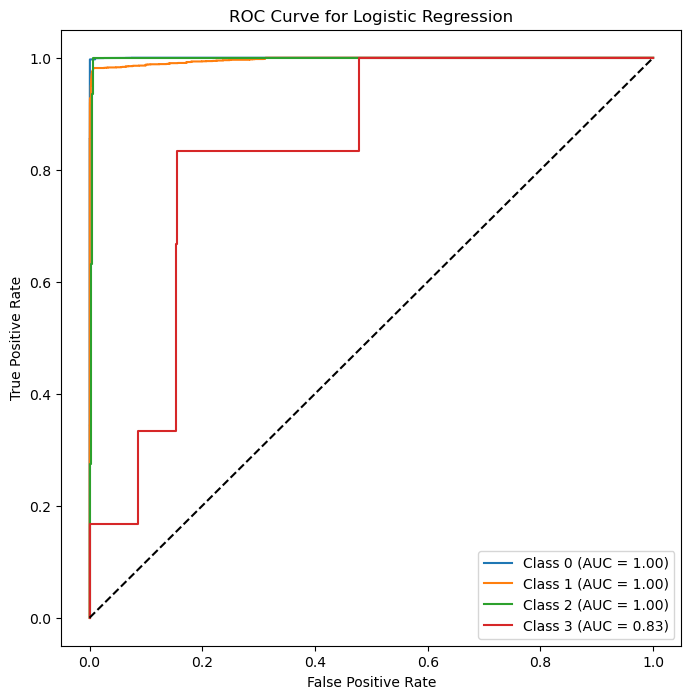

In [13]:

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, classification_report

def plot_roc_curves(y_test, y_pred_prob_lr):
    # Initialize figure
    plt.figure(figsize=(8, 8))
    
    # Number of classes
    n_classes = len(set(y_test))
    
    # Plot ROC curve for each class
    for i in range(n_classes):
        # Calculate ROC curve
        fpr, tpr, _ = roc_curve(y_test, y_pred_prob_lr[:, i], pos_label=i)
        roc_auc = auc(fpr, tpr)
        
        # Plot ROC curve
        plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')
    
    # Plot the diagonal line (no skill model)
    plt.plot([0, 1], [0, 1], 'k--')
    
    # Set labels and title
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve for Logistic Regression')
    
    # Add legend
    plt.legend(loc='lower right')
    
    # Show plot
    plt.show()

# Task 4: ROC curve plot for Logistic Regression
# Calculate the probabilities of each class
y_pred_prob_lr = lr_model.predict_proba(X_test_scaled)

# Plot ROC curves
plot_roc_curves(y_test, y_pred_prob_lr)


The ROC curve demonstrates the trade-off between true positive and false positive rates at different thresholds. The area under the curve (AUC) measures model performance.   


***

References   


Random Forests. [online] Available at:https://link.springer.com/article/10.1023/A:1010933404324. Accessed 04 April 2024 
Matplotlib 3.8.4 documentation. [online] Available at: https://matplotlib.org/. Accessed 13 April 2024   
   
2021. Iqbal, S. Deep Learning: A Comprehensive Overview on Techniques, Applications, and Research Directions [online] Available at: https://link.springer.com/article/10.1007/s42979-021-00815-1. Accessed 29 March 2024
   
2016. Rahim, A., Rahman, M., Ahmad, M. A Task-Based Performance Evaluation of Visualization Approaches for Categorical Data Analysis [online] Available at: https://www.researchgate.net/publication/. Accessed 30 March 2024   
   
2021. Brownlee, J. Types of Classification in Machine Learning [online] Available at: https://machinelearningmastery.com/types-of-classification-in-machine-learning/. Accessed 01 April 2024   
   
2019. Rajpurohit, A. Correlation Analysis in Data Science: A Comprehensive Guide [online] Available at: https://www.kdnuggets.com/2019/04/correlation-analysis-data-science-comprehensive-guide.html. Accessed 02 April 2024  
    
2021. Sheffield Hallam University. Analysing Data Using SPSS [online] Available at: https://students.shu.ac.uk/lits/it/documents/pdf/analysing_data_using_spss.pdf. Accessed 03 April 2024   
    
2021. S. K. Basu, S. K. Ghosh, and S. K. Pal. Deep Learning: A Comprehensive Overview on Techniques, Applications, and Research Directions [online] Available at: https://link.springer.com/article/10.1007/s42979-021-00815-1. Accessed 01 April 2024 